In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas import Series
from pandas.plotting import lag_plot

import math
from math import sqrt

from matplotlib import pyplot
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import warnings
warnings.filterwarnings("ignore")

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' 

In [2]:
flight_4 = pd.read_csv("Combined_Data_All.csv")
light = flight_4[["Timestamp", "Num_Flights", "Num_Covid_Cases"]]

In [3]:
data = light.groupby(by=["Timestamp"]).sum()
data.reset_index()
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('data.csv', sep=',', parse_dates=['Timestamp'], index_col='Timestamp',date_parser=dateparse)
data

,Num_Flights,Num_Covid_Cases
Timestamp,,
2020-01-22,7545,655.0
2020-01-23,8979,98.0
2020-01-24,9124,286.0
2020-01-25,7654,492.0
2020-01-26,6751,684.0
...,...,...
2022-01-27,8174,3122335.0
2022-01-28,8376,3138982.0
2022-01-29,6924,2146044.0


In [4]:
train_data, test_data = data[0:int(len(data)*0.9)], data[int(len(data)*0.9):]
real = test_data.iloc[:,0:1].values

In [5]:
ar_predictions = pd.read_csv("ar_predictions.csv")
arima_predictions = pd.read_csv("arima_predictions.csv")
lstm_predictions = pd.read_csv("lstm_predictions.csv")

In [6]:
ar_predictions = ar_predictions["0"]
arima_predictions = arima_predictions["0"]
lstm_predictions = lstm_predictions["0"]

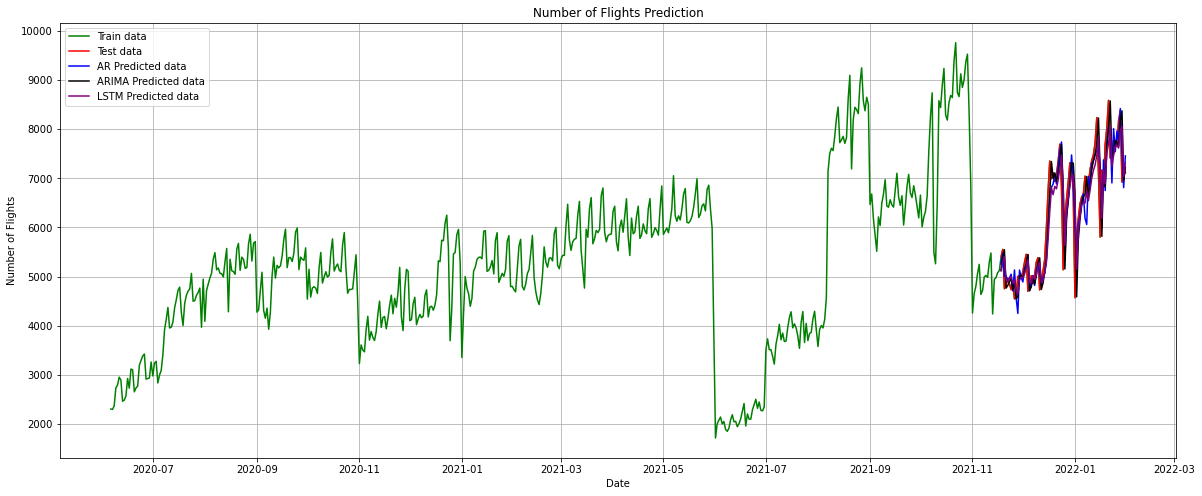

In [7]:
plt.figure(figsize=(20,8))
plt.plot(data.index[-600:], data['Num_Flights'].tail(600), color='green', label = 'Train data')
plt.plot(test_data.index, real, color = 'red', label = 'Test data')
plt.plot(test_data.index, ar_predictions, color = 'blue', label = 'AR Predicted data')
plt.plot(test_data.index, arima_predictions, color = 'black', label = 'ARIMA Predicted data')
plt.plot(test_data.index, lstm_predictions, color = 'purple', label = 'LSTM Predicted data')
plt.title('Number of Flights Prediction')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.legend()
plt.grid(True)
plt.show()

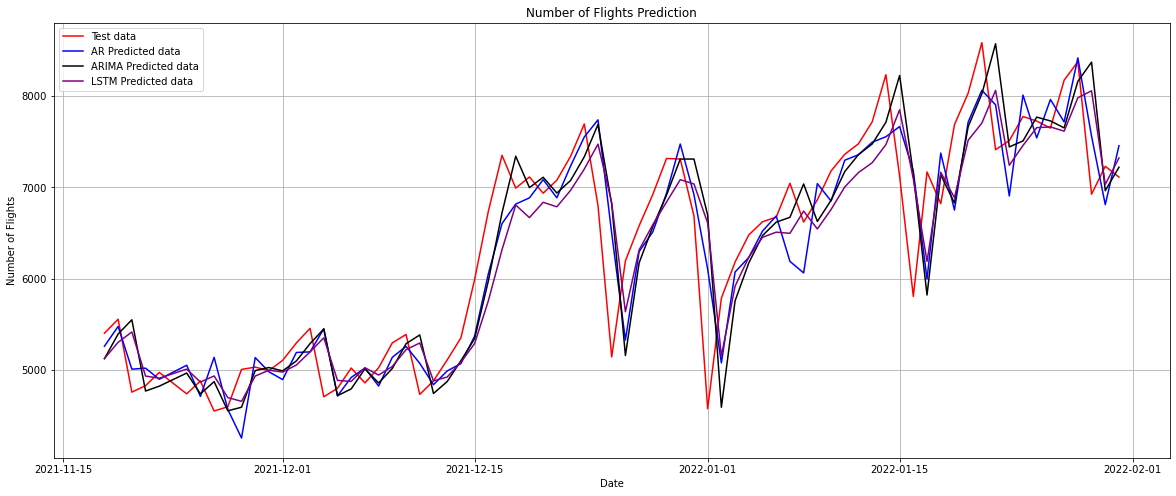

In [8]:
plt.figure(figsize=(20,8))
plt.plot(test_data.index, real, color = 'red', label = 'Test data')
plt.plot(test_data.index, ar_predictions, color = 'blue', label = 'AR Predicted data')
plt.plot(test_data.index, arima_predictions, color = 'black', label = 'ARIMA Predicted data')
plt.plot(test_data.index, lstm_predictions, color = 'purple', label = 'LSTM Predicted data')
plt.title('Number of Flights Prediction')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.legend()
plt.grid(True)
plt.show()